# Propensity Models

>Propensity modelling is used to predict the **likelihood of a customer taking a certain action** based on customer's attributes. In most marketing cases this would be propensity to purchase a product or propensity to click on an ad/offer. Classification models are used for propensity modelling applications.

## About Dataset

### Context
You get many visitors to your website every day, but you know only a small percentage of them are likely to buy from you, while most will perhaps not even return. Right now you may be spending money to re-market to everyone, but perhaps we could use machine learning to identify the most valuable prospects?

### Content
This data set represents a day's worth of visit to a fictional website. Each row represents a unique customer, identified by their unique UserID. The columns represent feature of the users visit (such as the device they were using) and things the user did on the website in that day. These features will be different for every website, but in this data a few of the features we consider are:

- **basket_add_detail**: Did the customer add a product to their shopping basket from the product detail page?
- **sign_in**: Did the customer sign in to the website?
- **saw_homepage**: Did the customer visit the website's homepage?
- **returning_user**: Is this visitor new, or returning?

In this data set we also have a feature showing whether the customer placed an order (ordered), which is what we predict on.

## EDA

We'll start with exploratory data analysis on the training dataset

In [70]:
import pandas as pd

train_data = pd.read_csv("training_sample.csv")
print(train_data.head())

                                UserID  basket_icon_click  basket_add_list  \
0  a720-6b732349-a720-4862-bd21-644732                  0                0   
1  a0c0-6b73247c-a0c0-4bd9-8baa-797356                  0                0   
2  86a8-6b735c67-86a8-407b-ba24-333055                  0                0   
3  6a3d-6b736346-6a3d-4085-934b-396834                  0                0   
4  b74a-6b737717-b74a-45c3-8c6a-421140                  0                1   

   basket_add_detail  sort_by  image_picker  account_page_click  \
0                  0        0             0                   0   
1                  0        0             0                   0   
2                  0        0             0                   0   
3                  0        0             0                   0   
4                  0        1             0                   0   

   promo_banner_click  detail_wishlist_add  list_size_dropdown  ...  \
0                   0                    0               

In [71]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

Get a sense of basic stats around data fields

In [72]:
train_data.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at correlation between data

In [73]:
corr = train_data.corr(numeric_only=True)
print(corr)

                         basket_icon_click  basket_add_list  \
basket_icon_click                 1.000000         0.466671   
basket_add_list                   0.466671         1.000000   
basket_add_detail                 0.529947         0.340968   
sort_by                           0.073016         0.106852   
image_picker                      0.082893         0.061462   
account_page_click                0.057253         0.028994   
promo_banner_click                0.109342         0.096608   
detail_wishlist_add               0.044153         0.019061   
list_size_dropdown                0.291608         0.469625   
closed_minibasket_click           0.323940         0.208082   
checked_delivery_detail           0.405787         0.264766   
checked_returns_detail            0.067149         0.030469   
sign_in                           0.478834         0.312276   
saw_checkout                      0.458774         0.297681   
saw_sizecharts                    0.008741         0.00

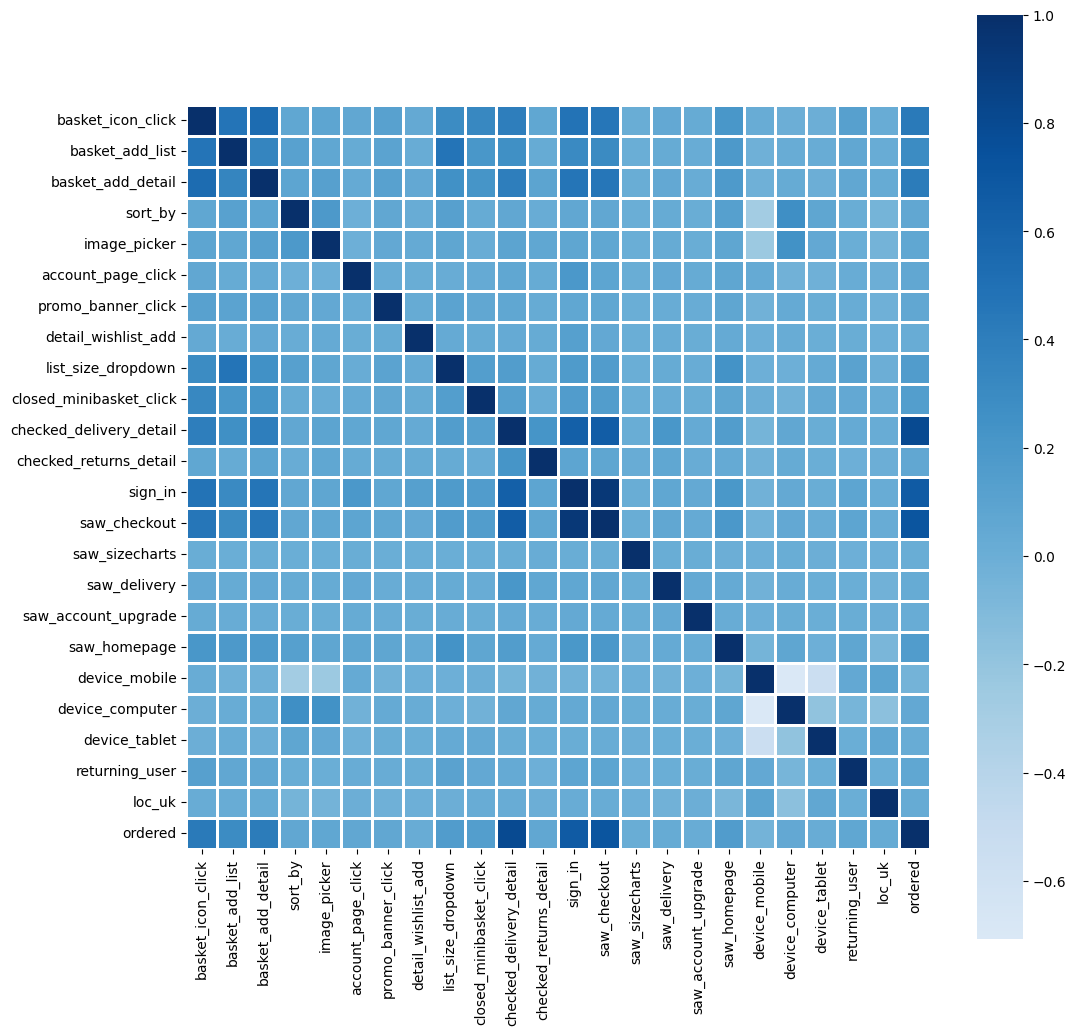

In [74]:
import matplotlib.pylab as plt
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.show()

In [75]:
print(corr['ordered'].sort_values(ascending=False))

ordered                    1.000000
checked_delivery_detail    0.798720
saw_checkout               0.708986
sign_in                    0.665556
basket_icon_click          0.428334
basket_add_detail          0.414420
basket_add_list            0.287666
saw_homepage               0.157778
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
image_picker               0.071492
returning_user             0.060295
checked_returns_detail     0.059484
account_page_click         0.057279
promo_banner_click         0.056533
sort_by                    0.054636
device_computer            0.049208
loc_uk                     0.031643
saw_delivery               0.031461
saw_account_upgrade        0.025857
detail_wishlist_add        0.023516
device_tablet              0.016939
saw_sizecharts             0.007548
device_mobile             -0.042907
Name: ordered, dtype: float64


## Data Preparation

Lets remove predictors that have a less than 10% correlation

In [76]:
drop_columns = corr[corr['ordered']<0.1]['ordered'].index.to_list()
X = train_data.drop(drop_columns, axis=1)
X = X.drop(['ordered','UserID'],axis=1)
y = train_data['ordered']

Splitting the data into training and testing sample in 70:30 ratio

In [77]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Training the Model

In [78]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier = classifier.fit(X_train,y_train)

In [79]:
from sklearn.metrics import classification_report
import sklearn.metrics

predictions = classifier.predict(X_test)
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[129575,   1419],
       [    58,   5569]], dtype=int64)

In [80]:
## Accuracy Score
print(sklearn.metrics.accuracy_score(y_test,predictions))

## F1 Score
print(sklearn.metrics.f1_score(y_test,predictions))

0.9891890704942872
0.8829171621086008


In [81]:
## Classification Report
print(sklearn.metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    130994
           1       0.80      0.99      0.88      5627

    accuracy                           0.99    136621
   macro avg       0.90      0.99      0.94    136621
weighted avg       0.99      0.99      0.99    136621



Lets look at feature importance

In [82]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(classifier, X_test, y_test)
importances = pd.Series(imps.importances_mean, index=X_test.columns)
print(importances)

basket_icon_click         -0.001730
basket_add_list           -0.001711
basket_add_detail         -0.001597
list_size_dropdown        -0.000432
closed_minibasket_click   -0.000776
checked_delivery_detail    0.023961
sign_in                    0.025015
saw_checkout               0.028278
saw_homepage              -0.000072
dtype: float64


<Axes: >

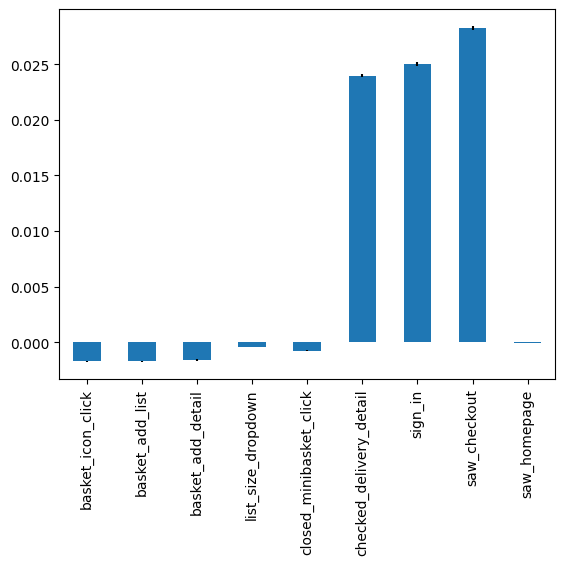

In [83]:
fig, ax = plt.subplots()
importances.plot.bar(yerr=imps.importances_std, ax=ax)

## Predicting on Final Set

In [84]:
test_data = pd.read_csv("testing_sample.csv")

userIDs = test_data['UserID']

test_X = test_data.drop(drop_columns, axis=1)
test_X = test_X.drop(['ordered','UserID'],axis=1)
print(test_X.head())

   basket_icon_click  basket_add_list  basket_add_detail  list_size_dropdown  \
0                  0                0                  0                   0   
1                  0                0                  0                   0   
2                  0                0                  0                   0   
3                  0                0                  1                   0   
4                  0                0                  0                   0   

   closed_minibasket_click  checked_delivery_detail  sign_in  saw_checkout  \
0                        0                        0        0             0   
1                        0                        0        0             0   
2                        0                        0        0             0   
3                        0                        0        0             0   
4                        0                        0        0             0   

   saw_homepage  
0             0  
1             

Adding the propensity score as a column field

In [85]:
test_X['propensity'] = classifier.predict_proba(test_X)[:,1]

print(test_X.head())

   basket_icon_click  basket_add_list  basket_add_detail  list_size_dropdown  \
0                  0                0                  0                   0   
1                  0                0                  0                   0   
2                  0                0                  0                   0   
3                  0                0                  1                   0   
4                  0                0                  0                   0   

   closed_minibasket_click  checked_delivery_detail  sign_in  saw_checkout  \
0                        0                        0        0             0   
1                        0                        0        0             0   
2                        0                        0        0             0   
3                        0                        0        0             0   
4                        0                        0        0             0   

   saw_homepage  propensity  
0             0     

In [86]:
pd.DataFrame(userIDs)
results = pd.concat([userIDs, test_X], axis=1)

print(results.sort_values(by=['propensity'],ascending=False).head())

                                    UserID  basket_icon_click  \
96830  k35d-80d7-6587k35d-80d7-4470-511032                  1   
48799  5k62-jk44-94455k62-jk44-4j67-335679                  1   
76470  d089-k2j4-7194d089-k2j4-47d8-262269                  1   
31271  9059-9j49-dd089059-9j49-4079-518123                  1   
31274  1kb7-7517-dd091kb7-7517-40k1-759486                  1   

       basket_add_list  basket_add_detail  list_size_dropdown  \
96830                0                  1                   0   
48799                0                  0                   0   
76470                0                  1                   0   
31271                1                  0                   1   
31274                1                  1                   1   

       closed_minibasket_click  checked_delivery_detail  sign_in  \
96830                        0                        1        1   
48799                        0                        1        1   
76470         